In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage, misc
import tensorflow as tf
import cv2
from math import fabs, sin, cos, radians
import numpy as np
from scipy.stats import mode


def get_img_rot_broa(img, degree=45, filled_color=-1):
    """
    Desciption:
            Get img rotated a certain degree,
        and use some color to fill 4 corners of the new img.
    """

    # 获取旋转后4角的填充色
    if filled_color == -1:
        filled_color = mode([img[0, 0], img[0, -1],
                             img[-1, 0], img[-1, -1]]).mode[0]
    if np.array(filled_color).shape[0] == 2:
        if isinstance(filled_color, int):
            filled_color = (filled_color, filled_color, filled_color)
    else:
        filled_color = tuple([int(i) for i in filled_color])

    height, width = img.shape[:2]

    # 旋转后的尺寸
    height_new = int(width * fabs(sin(radians(degree))) +
                     height * fabs(cos(radians(degree))))
    width_new = int(height * fabs(sin(radians(degree))) +
                    width * fabs(cos(radians(degree))))

    mat_rotation = cv2.getRotationMatrix2D((width / 2, height / 2), degree, 1)

    mat_rotation[0, 2] += (width_new - width) / 2
    mat_rotation[1, 2] += (height_new - height) / 2

    # Pay attention to the type of elements of filler_color, which should be
    # the int in pure python, instead of those in numpy.
    img_rotated = cv2.warpAffine(img, mat_rotation, (width_new, height_new),
                                 borderValue=filled_color)
    # 填充四个角
    mask = np.zeros((height_new + 2, width_new + 2), np.uint8)
    mask[:] = 0
    seed_points = [(0, 0), (0, height_new - 1), (width_new - 1, 0),
                   (width_new - 1, height_new - 1)]
    for i in seed_points:
        cv2.floodFill(img_rotated, mask, i, filled_color)

    return img_rotated

In [2]:
# pic_s=np.zeros((28,28,24))
# for i in range (0,24):
#     N=str(i+1)
#     a=Image.open('/Users/sofiadunlosky/Documents/models/number/'+N+'.png')
#     pic_s[:,:,i]=np.array(a)[:,:,0]
#np.save('pic_s.npy',pic_s)

In [3]:
# #15 intermediate categories: circle, square, triangle, cross, dot, line, curve, other shape, filled(shade), overlap, 1, 2, 3, 4, many.
# ans_s=np.zeros((15,24))
# ans_s[:,0]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
# ans_s[:,1]=[0,0,0,0,0,0,1,0,0,0,0,1,0,0,0]
# ans_s[:,2]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
# ans_s[:,3]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,4]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# ans_s[:,5]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
# ans_s[:,6]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
# ans_s[:,7]=[0,0,0,0,0,0,1,0,0,0,0,1,0,0,0]
# ans_s[:,8]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
# ans_s[:,9]=[0,0,0,0,0,0,1,0,0,0,0,1,0,0,0]
# ans_s[:,10]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
# ans_s[:,11]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,12]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,13]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,14]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,15]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,16]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,17]=[0,0,0,0,0,0,1,0,0,1,0,0,1,0,0]
# ans_s[:,18]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# ans_s[:,19]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# ans_s[:,20]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# ans_s[:,21]=[0,0,0,0,0,0,1,0,0,0,0,0,0,1,0]
# ans_s[:,22]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# ans_s[:,23]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
# np.save('ans_s.npy',ans_s)

In [4]:
pic_s=np.load('pic_s.npy')
ans_s=np.load('ans_s.npy')

In [22]:
def sample(Pic):
    n1=random.randint(0,4)
    n2=random.randint(0,4)
    pic1=misc.imresize(np.array(a)[35:75,81:123,:], (28, 28))[:,:,0]
    #pic1=misc.imresize(np.array(Pic)[33+n1:73+n1,79+n2:121+n2,:], (28, 28))[:,:,0]
    m=random.randint(0,20)
    #pic1[pic1<=190+m]=0
    #pic1[pic1>190+m]=1
    #pic1=pic1/255
    alpha=random.randint(0,360)
    #n3=random.randint(0,4)
    #n4=random.randint(0,4)
    if random.randint(0,2)==1:
        pic2=get_img_rot_broa(pic1, degree=alpha, filled_color=[255,255,255])
    else:
        pic2=get_img_rot_broa(pic1[::-1], degree=alpha, filled_color=[255,255,255])
    data=pic2[pic2.shape[0]-28:pic2.shape[0],pic2.shape[1]-28:pic2.shape[1]].reshape(1,784)/255
#     if i==0:
#         plt.imshow(data[i,:].reshape(28,28))
    #data[i,:]=pic2[4+n3:32+n3,4+n4:32+n4].reshape(1,784)
    answer=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
    return data,answer

In [32]:
k=random.randint(1,4)
d2=np.zeros((1,784))
for i in range (0,k):
    d1,a1=sample(a)
    d2+=d1
    d2-=np.min(d2)

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


In [31]:
d1,a1=sample(a)
np.min(d1)

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


0.21568627450980393

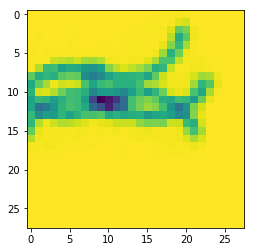

In [33]:
plt.imshow(d2.reshape(28,28))

In [40]:
def load_sample(Pic):
    data=np.zeros((8,784))
    answer=np.zeros((8,15))
    for i in range (0,8):
        if random.randint(0,2)==1:
            data[i,:],answer[i,:]=sample(Pic)
        else:
            k=random.randint(1,5)
            for i in range (0,k):
                d1,a1=sample(Pic)
                data[i,:]+=d1.reshape(784,)
                data[i,:]-=np.min(data[i,:])
            answer[i,:]=a1
            answer[i,10]=0
            answer[i,9]=1
            answer[i,9+k]=1
    return data,answer
                

In [ ]:
from 

In [37]:
# def load_sample(Pic,pic_s,ans_s):
#     data=np.zeros((8,784))
#     answer=np.zeros((8,15))
#     for i in range (0,8):
#         if random.randint(0,4)==1:
#             if random.randint(0,2)==1:
#                 n1=random.randint(0,4)
#                 n2=random.randint(0,4)
#                 pic1=misc.imresize(np.array(a)[35:75,81:123,:], (28, 28))[:,:,0]
#                 #pic1=misc.imresize(np.array(Pic)[33+n1:73+n1,79+n2:121+n2,:], (28, 28))[:,:,0]
#                 m=random.randint(0,20)
#                 #pic1[pic1<=190+m]=0
#                 #pic1[pic1>190+m]=1
#                 #pic1=pic1/255
#                 alpha=random.randint(0,360)
#                 #n3=random.randint(0,4)
#                 #n4=random.randint(0,4)
#                 if random.randint(0,2)==1:
#                     pic2=get_img_rot_broa(pic1, degree=alpha, filled_color=[255,255,255])
#                 else:
#                     pic2=get_img_rot_broa(pic1[::-1], degree=alpha, filled_color=[255,255,255])
#                 data[i,:]=pic2[pic2.shape[0]-28:pic2.shape[0],pic2.shape[1]-28:pic2.shape[1]].reshape(1,784)/255
#                 if i==0:
#                     plt.imshow(data[i,:].reshape(28,28))
#                 #data[i,:]=pic2[4+n3:32+n3,4+n4:32+n4].reshape(1,784)
#                 answer[i,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
#             else:
#                 data[i,:]=np.random.randint(255, size=(1,784))/255
#                 answer[i,:]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#         else:
#             data[i,:],answer[i,:]=variation(pic_s,ans_s)
#     return data,answer

In [6]:
def variation(pic_s,ans_s):
    o=np.random.randint(24)-1
    data=pic_s[:,:,o].reshape(1,784)/225
    answer=ans_s[:,o]
    return data,answer    
        
        
    

In [7]:
# Training Parameters
learning_rate = 0.0001
num_steps = 1000
batch_size = 8
display_step = 100

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 15 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [8]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [9]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [41]:
N='410'
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = load_sample(a)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
#     for step in range(1, num_steps+1):
#         batch_x, batch_y = variation(pic_s,ans_s)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y,
#                                                                  keep_prob: 1.0})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))
#     for step in range(1, num_steps+1):
#         batch_x, batch_y = load_sample(a)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y,
#                                                                  keep_prob: 1.0})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))
#     for step in range(1, num_steps+1):
#         batch_x, batch_y = variation(pic_s,ans_s)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y,
#                                                                  keep_prob: 1.0})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))
        
#     for step in range(1, num_steps+1):
#         batch_x, batch_y = variation(pic_s,ans_s)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y,
#                                                                  keep_prob: 1.0})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))

#     print("Optimization Finished!")

    #Calculate accuracy for 256 MNIST test images
#     print("Testing Accuracy:", \
#          sess.run(accuracy, feed_dict={X: test,
#                                        Y: answer_test,
#                                        keep_prob: 1.0}))




/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


Step 1, Minibatch Loss= 476481.5312, Training Accuracy= 0.000
Step 100, Minibatch Loss= 104925.8047, Training Accuracy= 0.375
Step 200, Minibatch Loss= 165929.4375, Training Accuracy= 0.625
Step 300, Minibatch Loss= 143786.7500, Training Accuracy= 0.250
Step 400, Minibatch Loss= 583233.1875, Training Accuracy= 0.625
Step 500, Minibatch Loss= 390545.3125, Training Accuracy= 0.750
Step 600, Minibatch Loss= 1313288.8750, Training Accuracy= 0.750
Step 700, Minibatch Loss= 694958.3750, Training Accuracy= 0.625
Step 800, Minibatch Loss= 883576.5000, Training Accuracy= 0.875
Step 900, Minibatch Loss= 3541659.0000, Training Accuracy= 0.500
Step 1000, Minibatch Loss= 4441215.0000, Training Accuracy= 0.750


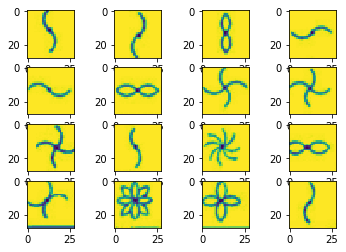

In [11]:
test=np.load('test.npy')
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(test[i,:].reshape(28,28))

In [12]:
ans_test=np.zeros((16,15))
ans_test[0,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
ans_test[1,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
ans_test[2,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[3,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
ans_test[4,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
ans_test[5,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[6,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[7,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[8,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[9,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
ans_test[10,:]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
ans_test[11,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[12,:]=[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0]
ans_test[13,:]=[0,0,0,0,0,0,1,0,0,1,0,0,0,0,1]
ans_test[14,:]=[0,0,0,0,0,0,1,0,0,1,0,0,0,1,0]
ans_test[15,:]=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]

In [42]:
test=np.load('test.npy')
 #Calculate accuracy for 256 MNIST test images
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test[0:8,:],
                                    Y: ans_test[0:8,:],
                                    keep_prob: 1.0}))
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test[8:16,:],
                                    Y: ans_test[8:16,:],
                                    keep_prob: 1.0}))

Testing Accuracy: 0.0
Testing Accuracy: 0.0


In [43]:
tf.

[]

In [44]:
batch_x.shape

(8, 784)